In [24]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract

%matplotlib inline




In [5]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)
    
   

In [9]:
path1 = './images/Cars0.png'
image = cv2.imread(path1)
path2 = './images/Cars1.png'
image2 = cv2.imread(path2)

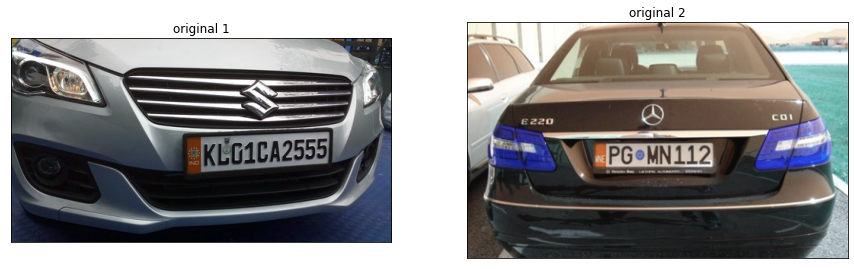

In [12]:
plot_images(image, image2, 'original 1', 'original 2')

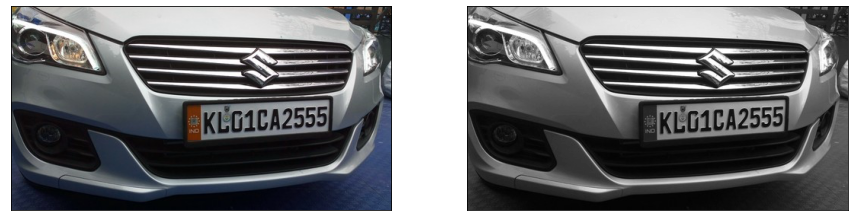

In [13]:
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plot_images(image, gray1)

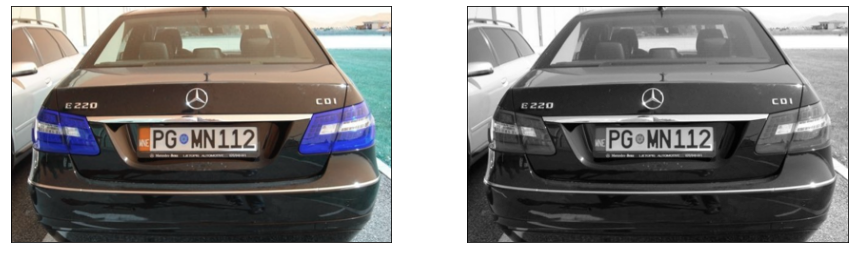

In [14]:
plot_images(image2, gray2)

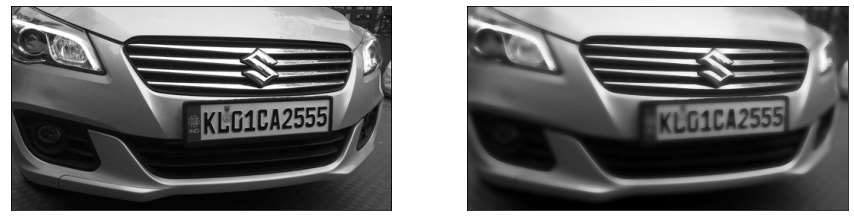

In [15]:
blur = cv2.bilateralFilter(gray1, 11,90, 90)
plot_images(gray1, blur)


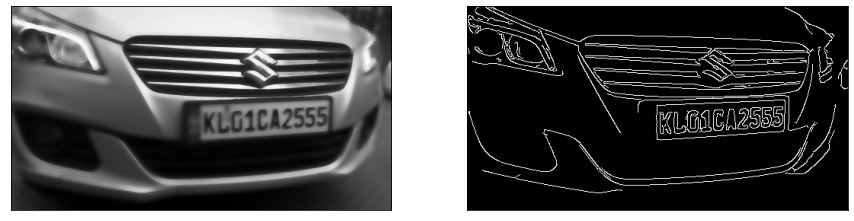

In [16]:
edges = cv2.Canny(blur, 30, 200)
plot_images(blur, edges)

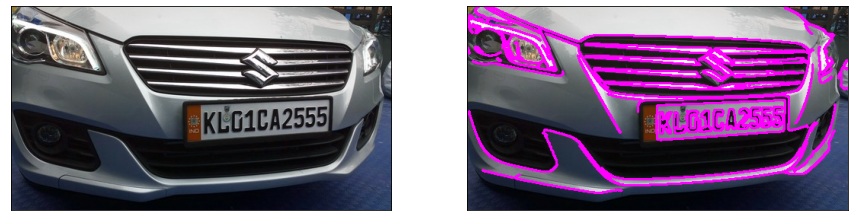

In [17]:
cnts, new = cv2.findContours(
                    edges.copy(), 
                    cv2.RETR_LIST, 
                    cv2.CHAIN_APPROX_SIMPLE
                )
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

plot_images(image, image_copy)


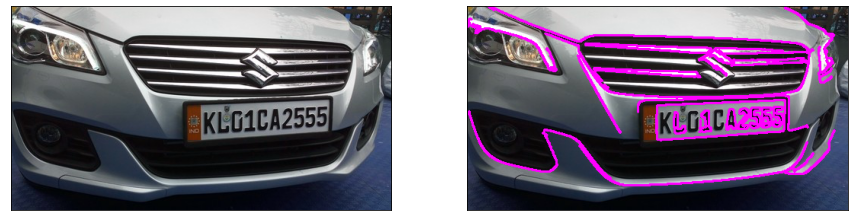

In [18]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)

In [19]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

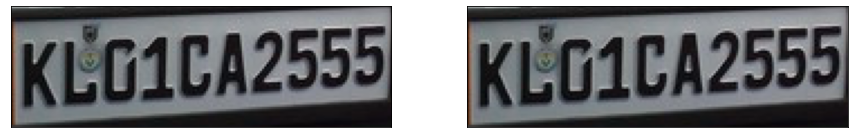

In [20]:
plot_images(plate, plate)


In [25]:

text = pytesseract.image_to_string(plate, lang="eng")
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.